In [20]:
import pandas as pd 

import psana as ps
import numpy as np
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as npply
import sys
import os
import h5py
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter as gf
from sklearn.utils import resample
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/TestCode/EarlyScience/AnalyzeH5/')
from chemRIXSAnalysis import *
from ChemRIXSClasses import *
from filterTools import *
sys.path.append('/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/')
from Functions import *
from Load_Scans import *
from raw_data_class import RawData as RDC
from pro_data_class import ProData as PDC


font = {'size'   : 16}
mpl.rc('font', **font)
%matplotlib widget
cmap = plt.cm.get_cmap('terrain').reversed()

In [21]:
exp = 'rixlv1519'
small_data_folder = '/reg/data/ana01/rix/%s/hdf5/smalldata/' % exp #changeme
scans = [54]
# raw = h5py.File(small_data_folder+'%s_Run%04d.h5' % (exp,scans))



In [ ]:
# print(list(raw.keys()))

# fim2_raw = []
# for i in raw['rix_fim2_raw']:
#             fim0_raw.append(np.array((raw['rix_fim0_raw'][i])))
#         fim2_raw = np.moveaxis(np.asarray(fim2_raw),0,1)
        
# print(np.array(raw['rix_fim2_raw'])
raw_datas[0].andor_dir_raw.shape

#Load in raw data

In [22]:
raw_datas = []
for scan in scans:
    raw_data = load_scans_2(small_data_folder,exp,scan)
    
    
    I0_intensities_fim0, I0_specs_fim0, baselines_fim0 = \
    process_fim(raw_data.fim0_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
    I0_intensities_fim1, I0_specs_fim1, baselines_fim1 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(0,50),np.arange(105,220))
    
    
    intensities_fim2, I0_specs_fim2, baselines_fim2 = \
    process_fim(raw_data.fim1_raw,np.arange(0,8),np.arange(200,250),np.arange(50,130))
        
#     intensities_fim2=process_fim_2(raw_data.fim2_raw,np.arange(0,8))
    
    andor_dir_intensities, andor_dir_specs, baseline_andor_dir = \
    process_andor(raw_data.andor_dir_raw,np.arange(500,800),np.arange(900,1250))
    
    raw_data.changeValue(I0_intensities_fim0=I0_intensities_fim0,
                        I0_specs_fim0=I0_specs_fim0,
                        baselines_fim0=baselines_fim0,
                        I0_intensities_fim1=I0_intensities_fim1,
                        I0_specs_fim1=I0_specs_fim1,
                        baselines_fim1=baselines_fim1,
                        intensities_fim2=intensities_fim2,
                        andor_dir_intensities=andor_dir_intensities,
                        andor_dir_specs=andor_dir_specs,
                        baseline_andor_dir=baseline_andor_dir)
    
    
    raw_datas = raw_datas + [raw_data]
print(raw_datas[0].getKeys())

loading fim0
loading fim1
loading andor
loading fim2
dict_keys(['xgmd', 'gmd', 'energy_raw', 'mono_encoder', 'pitch_raw', 'horz_raw', 'evrs', 'lxt', 'laser', 'fim0_raw', 'fim1_raw', 'andor_dir_raw', 'fim2_raw', 'I0_intensities_fim0', 'I0_specs_fim0', 'baselines_fim0', 'I0_intensities_fim1', 'I0_specs_fim1', 'baselines_fim1', 'intensities_fim2', 'andor_dir_intensities', 'andor_dir_specs', 'baseline_andor_dir'])


In [8]:
plt.close('all')

acceptance = 0.05
fim_chan = 6
y_to_fit = binned_vals.andor_dir_intensities_binned
x_to_fit = binned_vals.I0_intensities_fim1_binned
filter_params = bin_filtering(x_to_fit,y_to_fit,fim_chan,acceptance)

filtered_data = np.asarray([x[y] for x,y in zip(y_to_fit,filter_params)],dtype=object)
plt.figure(10)
plt.scatter(x_to_fit[50][:,6],y_to_fit[50],color='blue',alpha=0.5)
plt.scatter(x_to_fit[50][:,6][filter_params[50]],y_to_fit[50][filter_params[50]],color='red',alpha=0.3)
plt.show()

NameError: name 'binned_vals' is not defined

In [ ]:
plt.close('all')
## correlation filter between I0 and detector at each energy binx
# plt.figure()
# plt.scatter(np.squeeze(np.sum(raw_datas[0].I0_intensities_fim0[4:7,:],0)),raw_datas[0].andor_dir_intensities,alpha=0.05)
# plt.scatter(np.squeeze(np.sum(raw_datas[0].I0_intensities_fim0[4:7,:],0)),raw_datas[0].andor_dir_intensities,alpha=0.05)
# plt.figure()
# plt.scatter(raw_datas[0].I0_intensities_fim0[5,:],raw_datas[0].andor_dir_intensities,alpha=0.05)
# for i in range(4,8):
# #     plt.figure(10)
#     plt.scatter(binned_vals.I0_intensities_fim1_binned[50][:,i],binned_vals.andor_dir_intensities_binned[50],alpha=0.5)
#     plt.title('fim1')
#     plt.legend(('4','5','6','7'))
    
#     plt.figure(11)
#     plt.scatter(binned_vals.I0_intensities_fim0_binned[50][:,i]**2,binned_vals.andor_dir_intensities_binned[50],alpha=0.5)
#     plt.title('fim0')
#     plt.legend(('4','5','6','7'))
    

for i in range(0,len(binned_vals.andor_dir_intensities_binned)):
    if i%10 is 0:
        plt.scatter(binned_vals.I0_intensities_fim1_binned[i][:,6],binned_vals.andor_dir_intensities_binned[i],alpha=0.5)

Chekcking Mean waveforms

Text(0.5, 1.0, 'Mean Waveform Andor')

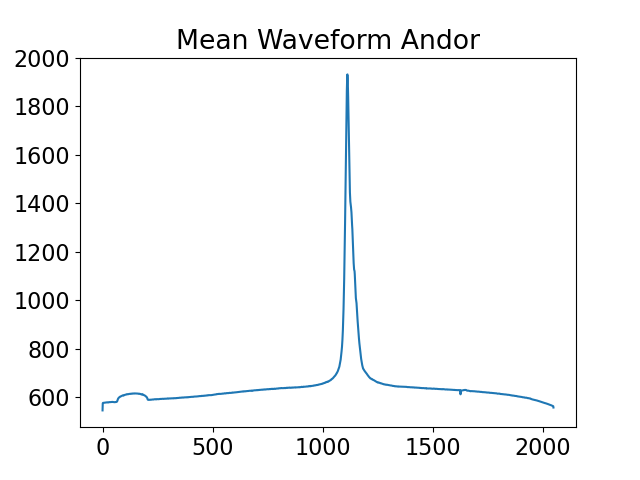

In [38]:
# raw_datas[0].getKeys()
# raw_datas[0].I0_specs_fim0[0,:].shape
# mean_waveform = np.mean(raw_datas[0].fim2_raw,0)
# mean_waveform.shape
# plt.figure()
# plt.plot(mean_waveform[0])
# plt.title('Mean Waveform Fim1 - Channel 7 - Run 28')

plt.figure()
plt.plot(np.mean(raw_datas[0].andor_dir_raw,0))
# plt.plot(np.mean(raw_datas[1].andor_dir_raw,0))

plt.title('Mean Waveform Andor')

# # raw_datas[0].andor_dir_raw.shape

In [ ]:
fim1= (raw_datas[0].I0_intensities_fim1[[5,6,7],:]).flatten()
fim0 = (raw_datas[0].I0_intensities_fim0[[5,6,7],:]).flatten()

In [ ]:
# plt.close('all')
# plt.figure()
# plt.plot(np.mean(raw_datas[0].andor_dir_raw,0))
# # plt.plot(np.mean(raw_datas[0].andor_dir_specs-raw_datas[0].baseline_andor_dir[:,np.newaxis],0))
# # np.sum(np.mean(raw_datas[0].andor_dir_specs-raw_datas[0].baseline_andor_dir[:,np.newaxis],0))
# # raw_datas[0].andor_dir_specs.shape
# # raw_datas[0].andor_dir_raw.shape

x = 5
y = 
plt.close('all')
plt.figure()
plt.scatter(raw_datas[0].I0_intensities_fim1[x,:],raw_datas[0].I0_intensities_fim1[y,:],alpha =0.1)


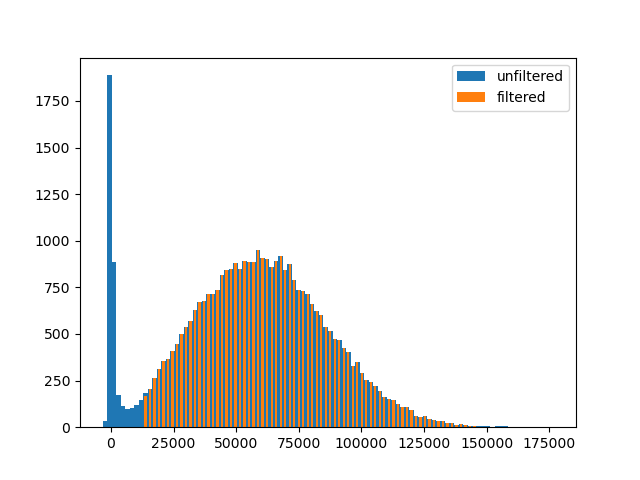

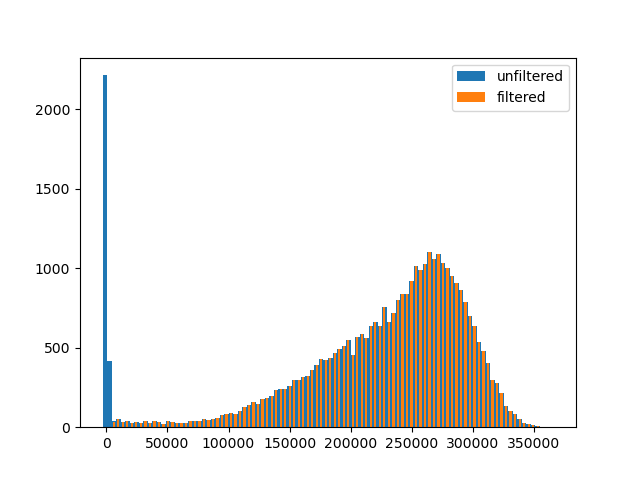

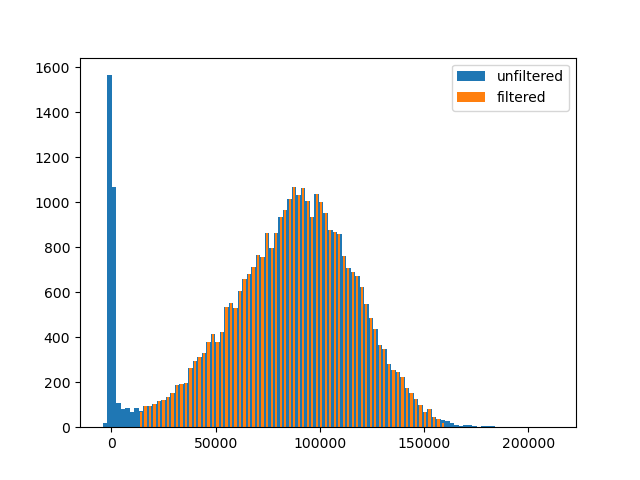

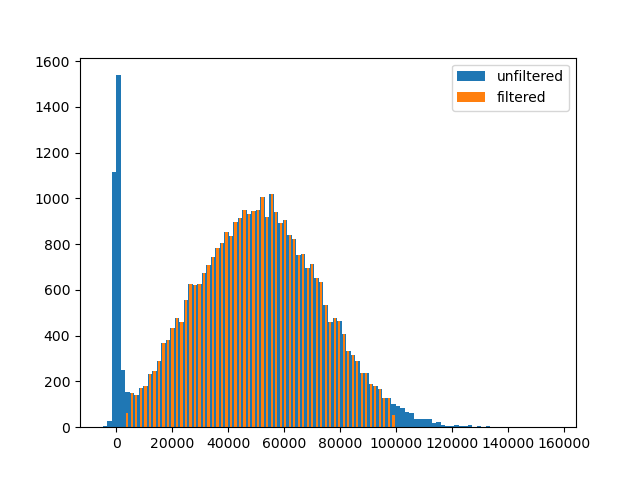

/reg/data/ana16/rix/rixlv1519/results/LCLS_LV15_2021/Functions/Functions.py:151: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(var_x[:,np.newaxis],var_y)


In [5]:
plt.close('all')
bounds_params = []
acceptance = 0.12
for raw in raw_datas:
    bounds_param = PDC()
    
    B_condition_1 = bounds_filter(raw.I0_intensities_fim1[4,:],[[13000,'None'],[3]],True) 
    B_condition_2 = bounds_filter(raw.I0_intensities_fim1[5,:],[[5000,'None'],[3]],True) 
    B_condition_3 = bounds_filter(raw.I0_intensities_fim1[6,:],[[6500,'None'],[2]],True) 
    B_condition_4 = bounds_filter(raw.I0_intensities_fim1[7,:],[[4000,'None'],[2]],True) 

    # raw.I0_intensities_fim0[4,:] is I0 intensities from fim0 channel 4


    bounds_condition = B_condition_4 #& B_condition_2 & B_condition_3 & B_condition_4

#    L_condition_1 = lin_filter(raw.I0_intensities_fim1[4,:], raw.andor_dir_intensities,[0.1,True],True)
#     L_condition_2 = lin_filter(raw.I0_intensities_fim1[5,:], raw.andor_dir_intensities,[0.1,True],True)
    L_condition_3 = lin_filter(raw.I0_intensities_fim1[6,:], raw.andor_dir_intensities,[0.1,True],False)
#    L_condition_4 = lin_filter(raw.I0_intensities_fim1[7,:], raw.andor_dir_intensities,[0.1,True],True)
# 
#     y = raw.andor_dir_intensities
#     x = raw.I0_intensities_fim1[6,:]
#     scale = np.max([x,y])
#     poly_fit = np.polyfit(x, y,2)
#     cond_poly_high = y < (x**2) * poly_fit[0] + x*poly_fit[1]+poly_fit[2] + acceptance*scale
#     cond_poly_low = y > (x**2) * poly_fit[0] + x*poly_fit[1]+poly_fit[2] - acceptance*scale
#     L_condition_1 = cond_poly_high & cond_poly_low
    linearity_condition = L_condition_3

#     plt.figure()
#     plt.scatter(x,y,alpha=0.95)
#     plt.scatter(x[L_condition_1],y[L_condition_1],alpha=0.05)
#     plt.show()
    condition = bounds_condition & linearity_condition
    
    bounds_param.changeValue(condition=condition)
    bounds_params = bounds_params + [bounds_param]
    


In [41]:
############# Were checking Monocalib function, found run 54 broke because of nan in mono_encoder#######################

# energy_raw,mono_encoder = raw_datas[0].energy_raw,raw_datas[0].mono_encoder

# NaN_entries = []
# energy_raw_new = []
# for i in range(len(energy_raw)):
#     if np.isnan(energy_raw[i]):
#         NaN_entries.append(i)
#     else:
#         energy_raw_new.append(energy_raw[i])
# NaN_entries = np.asarray(NaN_entries)
# mono_encoder_new = mono_encoder.copy()
# for i in range(len(NaN_entries)):
#     mono_encoder_new[NaN_entries[i]] = 0
# mono_encoder_new = mono_encoder_new[mono_encoder_new!=0]

# print(np.array(energy_raw_new).shape)
# print(np.array(mono_encoder_new).shape)

# # np.sum(np.array(energy_raw_new))
# # raw_datas[0].mono_encoder[0][0]
# np.sum(np.array(mono_encoder_new))

(36705,)
(36705,)


nan

In [7]:
vars_to_bin = ['I0_intensities_fim0','I0_intensities_fim1','intensities_fim2','andor_dir_intensities']
scan = 0
nan_cond = np.logical_not(np.isnan(np.squeeze(raw_datas[scan].mono_encoder)))
binned_vals = PDC()
n_bins = 100
for var_to_bin in vars_to_bin:
    x_value = np.squeeze(raw_datas[scan].mono_encoder)[nan_cond]
    y_value = np.transpose(getattr(raw_datas[scan],var_to_bin))[nan_cond]
    bins, mean_val, shot_by_shot = energy_binning(x_value,y_value,n_bins)
    means = {var_to_bin+'_binned_mean':mean_val}
    shots = {var_to_bin+'_binned':shot_by_shot}
    binned_vals.__dict__.update(means)
    binned_vals.__dict__.update(shots)
    print(bins)

binned_vals.getKeys()



[3281.511191   3281.94569084 3282.38019068 3282.81469052 3283.24919035
 3283.68369019 3284.11819003 3284.55268987 3284.98718971 3285.42168955
 3285.85618938 3286.29068922 3286.72518906 3287.1596889  3287.59418874
 3288.02868858 3288.46318841 3288.89768825 3289.33218809 3289.76668793
 3290.20118777 3290.63568761 3291.07018744 3291.50468728 3291.93918712
 3292.37368696 3292.8081868  3293.24268664 3293.67718647 3294.11168631
 3294.54618615 3294.98068599 3295.41518583 3295.84968567 3296.28418551
 3296.71868534 3297.15318518 3297.58768502 3298.02218486 3298.4566847
 3298.89118454 3299.32568437 3299.76018421 3300.19468405 3300.62918389
 3301.06368373 3301.49818357 3301.9326834  3302.36718324 3302.80168308
 3303.23618292 3303.67068276 3304.1051826  3304.53968243 3304.97418227
 3305.40868211 3305.84318195 3306.27768179 3306.71218163 3307.14668146
 3307.5811813  3308.01568114 3308.45018098 3308.88468082 3309.31918066
 3309.75368049 3310.18818033 3310.62268017 3311.05718001 3311.49167985
 3311.9

dict_keys(['condition', 'I0_intensities_fim0_binned_mean', 'I0_intensities_fim0_binned', 'I0_intensities_fim1_binned_mean', 'I0_intensities_fim1_binned', 'intensities_fim2_binned_mean', 'intensities_fim2_binned', 'andor_dir_intensities_binned_mean', 'andor_dir_intensities_binned'])

In [12]:
plt.close('all')

acceptance = 0.05
fim_chan = 6
y_to_fit = binned_vals.andor_dir_intensities_binned
x_to_fit = binned_vals.I0_intensities_fim1_binned
filter_params = bin_filtering(x_to_fit,y_to_fit,fim_chan,acceptance)

# filtered_data = np.asarray([x[y] for x,y in zip(y_to_fit,filter_params)],dtype=object)
# plt.figure(10)
# plt.scatter(x_to_fit[50][:,6],y_to_fit[50],color='blue',alpha=0.5)
# plt.scatter(x_to_fit[50][:,6][filter_params[50]],y_to_fit[50][filter_params[50]],color='red',alpha=0.3)
# plt.show()

/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:7: RankWarning: Polyfit may be poorly conditioned
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:7: RankWarning: Polyfit may be poorly conditioned
/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.3/lib/python3.7/site-packages/ipykernel/__main__.py:7: RankWarning: Polyfit may be poorly conditioned


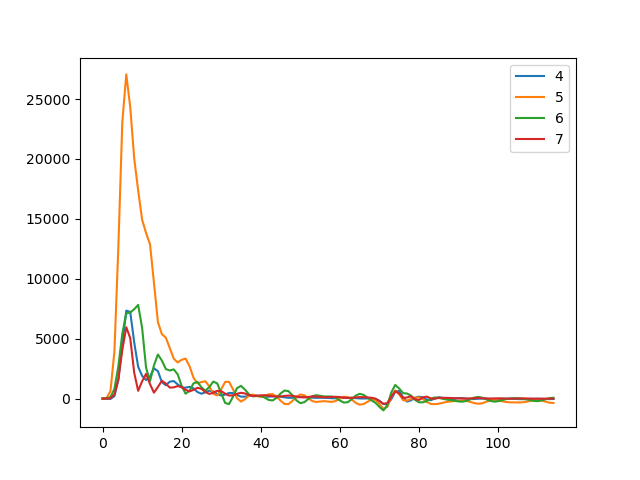

In [13]:
# # plt.figure()
# plt.plot(np.mean(raw_datas[0].fim1_raw[:,7,:],0))
# # plt.show()
# raw_datas[0].fim1_raw[:,4,:].shape
# plt.legend(('4','5','6','7'))
# plt.show()

plt.figure()
for i in range(4,8):
    plt.plot(-np.mean(raw_datas[0].I0_specs_fim1[i,:]-raw_datas[0].baselines_fim1[i,:,np.newaxis],0))
plt.legend(('4','5','6','7'))
plt.show()

# plt.figure()
# plt.scatter(raw_datas[0].andor_dir_intensities,raw_datas[0].I0_intensities_fim1[4,:],alpha=0.01)
# raw_datas[0].I0_specs_fim0[i,:].shape
# raw_datas[0].baselines_fim0[i,:,np.newaxis].shape

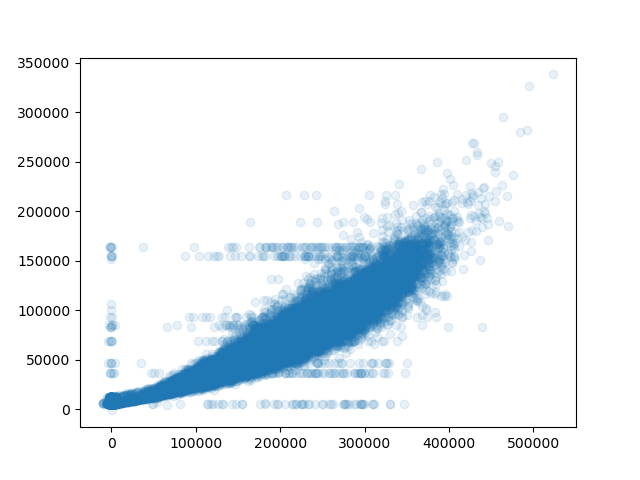

In [14]:
all_fims = np.sum(raw_datas[0].I0_intensities_fim1[[4,6,7],:],0)
plt.figure()
plt.scatter(all_fims,raw_datas[0].andor_dir_intensities,alpha=0.1)

# raw_datas[0].I0_intensities_fim1[4,:].shape

In [11]:
scan_type = 'mono'
# scan_type = 'time'

pro_datas = []
for i in range(0,len(raw_datas)):
    pro_data = PDC()
    pumped = raw_datas[i].laser==1
    unpumped = raw_datas[i].laser==0
    condition = bounds_params[i].condition
    all_fims = np.sum(raw_datas[i].I0_intensities_fim1[[4,6,7],:],0)

#     norm_by = all_fims
    norm_by = raw_datas[i].I0_intensities_fim1[7,:]

    
    if scan_type is 'mono':

        n_bins = 100
        mono_encoder_ev = np.squeeze(mono_calib(raw_datas[i].energy_raw,raw_datas[i].mono_encoder))
        
        x_vals = np.squeeze(raw_datas[i].mono_encoder)#mono_encoder_ev
#         x_vals = mono_encoder_ev

        y_vals = raw_datas[i].andor_dir_intensities
#         y_vals = raw_datas[i].intensities_fim2[0,:]
#         y_vals = np.sum(raw_datas[i].andor_dir_specs,1)
#         y_vals = norm_by
        
        ##### pumped #####
        energy,intensity_raw_pumped = \
        mono_spectrum(x_vals[pumped],n_bins,y_vals[pumped])
        
        energy,intensity_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped])
        
        energy,intensity_norm_filtered_pumped = \
        mono_spectrum(x_vals[condition&pumped],n_bins,y_vals[condition&pumped]/norm_by[condition&pumped])
        
        ##### unpumped #####
        energy,intensity_raw_unpumped = \
        mono_spectrum(x_vals[unpumped],n_bins,y_vals[unpumped])
        
        energy,intensity_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped])
        
        energy,intensity_norm_filtered_unpumped = \
        mono_spectrum(x_vals[condition&unpumped],n_bins,y_vals[condition&unpumped]/norm_by[condition&unpumped])

        
        pro_data.changeValue(energy=energy,
                             intensity_raw_pumped = intensity_raw_pumped,
                             intensity_filtered_pumped = intensity_filtered_pumped,
                             intensity_norm_filtered_pumped = intensity_norm_filtered_pumped,
                             intensity_raw_unpumped = intensity_raw_unpumped,
                             intensity_filtered_unpumped = intensity_filtered_unpumped,
                             intensity_norm_filtered_unpumped = intensity_norm_filtered_unpumped)
        
        pro_datas = pro_datas + [pro_data]

        

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [9]:
plt.close('all')
for i in range(0,len(scans)):
    plt.plot(pro_datas[i].energy,pro_datas[i].intensity_norm_filtered_pumped)
    plt.plot(pro_datas[i].energy,pro_datas[i].intensity_norm_filtered_unpumped)
    plt.show()


# # plt.figure()
# # plt.plot(pro_datas[1].energy,pro_datas[1].intensity_raw_pumped)
# # plt.plot(pro_datas[1].energy,pro_datas[1].intensity_filtered_pumped)
# # plt.show()

# plt.figure(10)
# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_raw_pumped)#/np.max(pro_datas[0].intensity_raw_pumped))
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_norm_filtered_pumped/np.max(pro_datas[0].intensity_norm_filtered_pumped))

# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped)#/np.max(pro_datas[0].intensity_norm_filtered_pumped))
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_raw_pumped/np.max(pro_datas[0].intensity_raw_pumped))
# plt.legend(('4','5','6','7'))
# plt.show()


# plt.figure(11)
# plt.plot(pro_datas[0].energy,pro_datas[0].intensity_raw_pumped/np.max(pro_datas[0].intensity_raw_pumped))
# plt.plot(pro_datas[1].energy,pro_datas[1].intensity_norm_filtered_pumped)
# plt.legend(('4','5','6','7'))
# plt.show()

# plt.figure(11)
# plt.plot(np.mean(raw_datas[0].fim1_raw[:,7,:],0))
# # plt.show()
# # raw_datas[0].fim1_raw[:,5,:].shape
# plt.legend(('4','5','6','7'))
# plt.show()
# raw_datas[i].mono_encoder.shape

IndexError: list index out of range

In [15]:
# mono_encoder_ev = np.squeeze(mono_calib(raw_datas[1].energy_raw,raw_datas[1].mono_encoder))


energy,intensity_raw = \
mono_spectrum(raw_datas[1].mono_encoder,n_bins,raw_datas[1].mono_encoder)

# plt.figure()
# plt.plot(raw_datas[1].mono_encoder)#,raw_datas[1].andor_dir_intensities)
n_bins = 10
bins = np.linspace(np.min(raw_datas[1].mono_encoder),np.max(raw_datas[1].mono_encoder),n_bins)

print(bins)
print(np.min(raw_datas[1].mono_encoder))
print(np.max(raw_datas[1].mono_encoder))
test = np.squeeze(raw_datas[1].mono_encoder)
intensity=[]
lower_bound = bins[0]
for i in range(0,len(bins)-1):
    bin_cond = np.logical_and(test>bins[i],test<bins[i+1])
    intensity.append(np.sum(raw_datas[1].andor_dir_intensities[bin_cond]))
intensity = np.asarray(intensity)

IndexError: list index out of range

In [16]:
# plt.figure()
# plt.scatter(np.square(raw_datas[0].I0_intensities_fim1[5,:]), raw_datas[0].andor_dir_intensities,alpha=0.1)
# np.squeeze(raw_datas[1].mono_encoder).shape

# test = np.squeeze(raw_datas[1].mono_encoder)
# print(test.shape)
# print(test[np.logical_and(test<bins[1],test>bins[0])].shape)

y_value = raw_datas[0].andor_dir_intensities

n_bins = 50
vernier_energy = np.squeeze(raw_datas[1].mono_encoder)
bins = np.linspace(np.min(vernier_energy),np.max(vernier_energy),n_bins)


intensity=[]
for i in range(0,len(bins)-1):
    bin_cond = np.logical_and(vernier_energy>=bins[i],vernier_energy<=bins[i+1])
    intensity.append(np.sum(y_value[bin_cond]))
intensity = np.asarray(intensity)
plt.figure()
plt.plot(intensity)

IndexError: list index out of range

In [69]:
scans

[44, 45, 46, 47, 48, 49, 50]

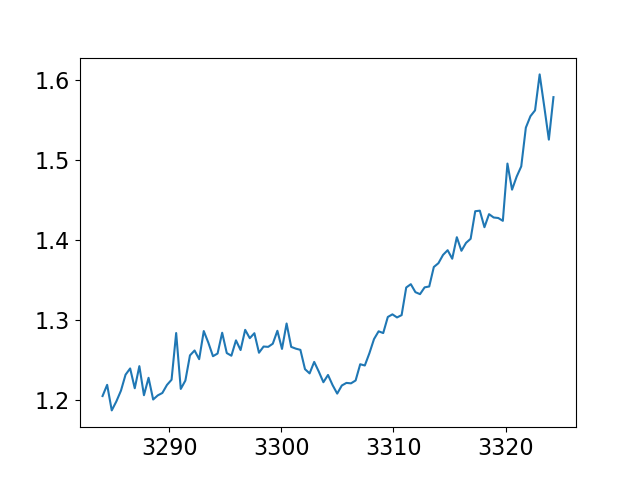

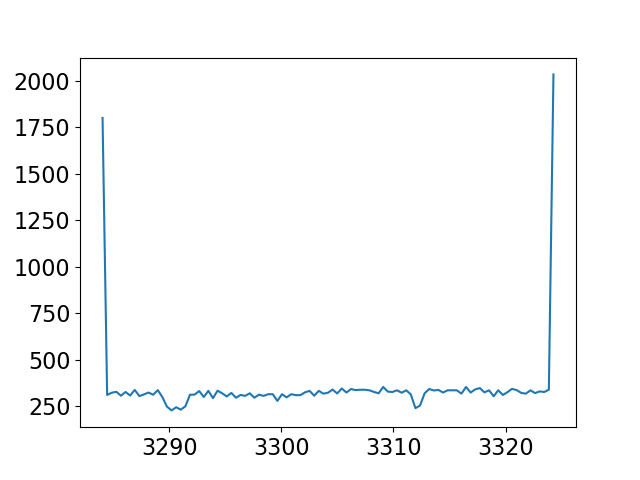

IndexError: list index out of range

In [31]:
plt.close('all')
# scan = 4
for scan in [0,1,2,4,5,6]:
    data = raw_datas[scan]
    cond = bounds_params[scan].condition
    norm_by = raw_datas[scan].I0_intensities_fim1[7,:]
    all_fims = np.sum(raw_datas[scan].I0_intensities_fim1[[4,6,7],:],0)

    y_value = data.andor_dir_intensities/norm_by
#     y_value = norm_by**2

    # y_value = np.mean(data.I0_intensities_fim0[4:7,:],0)
    x_value = data.mono_encoder
    n_bins = 100
    bins,intensity,shots = energy_binning(x_value[cond],y_value[cond],n_bins)
    shots_per_bin = np.asarray([i.shape[0] for i in shots])

    plt.figure(15)
    plt.plot(bins[0:-1],intensity)#/np.max(intensity))
    plt.show()
    plt.figure(16)
    # _, bins, _ = plt.hist(shots)#, 100, label='unfiltered')
    plt.plot(bins[0:-1],shots_per_bin)
    plt.show()

In [ ]:
scan = 4
plt.figure()
plt.scatter(raw_datas[scan].I0_intensities_fim1[6,:],raw_datas[scan].andor_dir_intensities,alpha=0.1)

In [ ]:
raw_datas[0].I0_intensities_fim0.shape

In [ ]:
raw_datas